In [1]:
import pandas as pd
import seaborn as sns
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pylab import figure
from matplotlib import animation
from IPython.display import HTML
import ffmpeg

### Initialization 
In this step:
- Create an AFINN object for parsing the data
- Read and convert the data into a panda dataframe for analysis
- print the dataframe's preview, a truncated view of the data

In [2]:
afinn = Afinn(emoticons=True)
file = pd.read_excel ('reviews.xlsx')
#creating the pandas' DataFrame
df = pd.DataFrame(file, columns=file.columns)
df

date                     reviewer  helpful  \
0    2020-03-27  reviewer's username removed   4967.0   
1    2020-04-12  reviewer's username removed   1754.0   
2    2020-04-12  reviewer's username removed    515.0   
3    2020-03-30  reviewer's username removed   1825.0   
4    2020-04-23  reviewer's username removed    520.0   
...         ...                          ...      ...   
1389 2020-04-18  reviewer's username removed      NaN   
1390 2020-04-05  reviewer's username removed      3.0   
1391 2020-04-06  reviewer's username removed      NaN   
1392 2020-04-07  reviewer's username removed      8.0   
1393 2020-04-13  reviewer's username removed      7.0   

                                                comment  
0     This is a fun app but there are some curse wor...  
1     This app is amazing! I honestly think you shou...  
2     Hi, since i got TikTok a few days ago, It was ...  
3     If you follow many people it says you're follo...  
4     Hi Tiktok team, I had a TikTok account with th...  
...                                                 ...  
1389  I really like this app and I enjoyed a lot by ...  
1390  I really like it but whenever I try to make a ...  
1391  Amazing app but my only complaint is that when...  
1392  I mean- ......"DoNt bE ShY pUt SoMe mOrE";). (...  
1393  I use TikTok everyday, when I'm sad, happy, an...  

[1394 rows x 4 columns]

# Formatting output
- We then expand the dataframe's output format so that all columns are printed in their entirety, as opposed to the default where they are truncated.

In [3]:
# expend output format, so that all data is printed, replace first option with 'None' to print entire dataset
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Generating the sentiment analysis 1. Afinn lexicon
With the dataframe created above, this step:
- appends additional columns "score" and "sentiment_category". These indicate how each review is scored according to the AFINN lexicon
- For each entry, a score's sign indicates its category in the "sentiment_category" column, with zero indicating a neutral review


In [4]:
#adding new two column: 'afinn score' and 'afinn sentiment category' 
score = []
[score.append(afinn.score(af)) for af in df.iloc[:,3]]
df['afinn score'] = score

sentiment_category = ['positive' if sco > 0 
                          else 'negative' if sco < 0 
                              else 'neutral' 
                                  for sco in score]
    

df['afinn sentiment category'] = sentiment_category
df

date                     reviewer  helpful  \
0    2020-03-27  reviewer's username removed   4967.0   
1    2020-04-12  reviewer's username removed   1754.0   
...         ...                          ...      ...   
1392 2020-04-07  reviewer's username removed      8.0   
1393 2020-04-13  reviewer's username removed      7.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                             comment  \
0     This is a fun app but there are some curse words in videos. but if you put your birthday 2008 or up then it will give you kid friendly videos with a private account. I think this app is super cool and you should give it a try. Also when you download it you dont have to make an account to watch videos you can just watch them but you cant like anything. Anyway I highly recommend this app for at least 9 or older. Hope you enjoy!!   
1                                    This app is amazing! I honestly think you should have a filter for the sad little children who play this game. There's a ton of 13+ audios and videos that innocent children can run into. There should be a 13+ switch in the app settings for parents to use. And also, I think you shouldn't have a problem with LGBTQ. People can like who they want and you shouldn't ban them from streams if they do so.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1392                                 I mean- ......"DoNt bE ShY pUt SoMe mOrE";). ( Ive had this app for at least 2 years now and ive had no problems with it and i decided y not rate it tbh it takes up a lot of my time so when im bored i can just go on here next thing i know it has been 20 mins but yeah aswell as they got sum pretty funny things that made me die of luaghter and people of all ages are welcome to make fun videos!!:/ )   
1393                                                                                                                                                                                                                                                                              I use TikTok everyday, when I'm sad, happy, and bored. TikTok is great don't get me wrong but it's kinda addicting.. when you start scrolling you just can't stop.   

      afinn score afinn sentiment category  
0            17.0                 positive  
1             1.0                 positive  
...           ...                      ...  
1392          3.0                 positive  
1393         -1.0                 negative  

[1394 rows x 6 columns]

### Generating the sentiment analysis 2. Vader lexicon
Similar to the step above, but this time using the vader lexicon, for comparison. Note that the same sorted order from the afinn lexicon is preserved so the output is comparable to the one above. To make the comparison easier, the score and sentiment category are appended to the data frame to show  a one to one view of the two lexicons. 
The vader lexicon differs from the afinn counterpart in the way the scores are computed. 
The vader lexicon scores betweeen -0.05 and 0.05 to destinguish negative and positive scores, whereas the afinn lexicon uses negative and positive numbers respectively to achieve the same 

In [5]:
#perform the same analysis using vader lexicon, adding new two column: 'vader score' and 'vader sentiment category' 
vader_score = []
v_s_compound = []
vader_sentiment_category = []
[vader_score.append(SentimentIntensityAnalyzer().polarity_scores(text)) for text in df.iloc[:,3]]
df['vader score'] = vader_score

for v_score in vader_score:
    v_s_compound.append(v_score['compound'])
    if v_score['compound'] >= 0.05:
        vader_sentiment_category.append('positive')
    elif v_score['compound'] <= -0.05:
        vader_sentiment_category.append('negative')
    else:
        vader_sentiment_category.append('neutral')
    

df['vader sentiment category'] = vader_sentiment_category
df['vader score'] = v_s_compound
df

date                     reviewer  helpful  \
0    2020-03-27  reviewer's username removed   4967.0   
1    2020-04-12  reviewer's username removed   1754.0   
...         ...                          ...      ...   
1392 2020-04-07  reviewer's username removed      8.0   
1393 2020-04-13  reviewer's username removed      7.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                             comment  \
0     This is a fun app but there are some curse words in videos. but if you put your birthday 2008 or up then it will give you kid friendly videos with a private account. I think this app is super cool and you should give it a try. Also when you download it you dont have to make an account to watch videos you can just watch them but you cant like anything. Anyway I highly recommend this app for at least 9 or older. Hope you enjoy!!   
1                                    This app is amazing! I honestly think you should have a filter for the sad little children who play this game. There's a ton of 13+ audios and videos that innocent children can run into. There should be a 13+ switch in the app settings for parents to use. And also, I think you shouldn't have a problem with LGBTQ. People can like who they want and you shouldn't ban them from streams if they do so.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1392                                 I mean- ......"DoNt bE ShY pUt SoMe mOrE";). ( Ive had this app for at least 2 years now and ive had no problems with it and i decided y not rate it tbh it takes up a lot of my time so when im bored i can just go on here next thing i know it has been 20 mins but yeah aswell as they got sum pretty funny things that made me die of luaghter and people of all ages are welcome to make fun videos!!:/ )   
1393                                                                                                                                                                                                                                                                              I use TikTok everyday, when I'm sad, happy, and bored. TikTok is great don't get me wrong but it's kinda addicting.. when you start scrolling you just can't stop.   

      afinn score afinn sentiment category  vader score  \
0            17.0                 positive       0.9672   
1             1.0                 positive       0.9383   
...           ...                      ...          ...   
1392          3.0                 positive       0.9428   
1393         -1.0                 negative       0.6607   

     vader sentiment category  
0                    positive  
1                    positive  
...                       ...  
1392                 positive  
1393                 positive  

[1394 rows x 8 columns]

## Present sorted data
- With the two lexicons evaluated, we then show the two side by side with the data
- Results are sorted according to how helpful they were and the afinn score given. 

In [6]:
sorted = df.sort_values(['helpful', 'afinn score'], ascending = [False, False])

sorted

date                     reviewer  helpful  \
0    2020-03-27  reviewer's username removed   4967.0   
27   2020-05-05  reviewer's username removed   2359.0   
...         ...                          ...      ...   
937  2020-04-06  reviewer's username removed      NaN   
1101 2020-04-10  reviewer's username removed      NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             comment  \
0                                                     This is a fun app but there are some curse words in videos. but if you put your birthday 2008 or up then it will give you kid friendly videos with a private account. I think this app is super cool and you should give it a try. Also when you download it you dont have to make an account to watch videos you can just watch them but you cant like anything. Anyway I highly recommend this app for at least 9 or older. Hope you enjoy!!   
27    Dear tik tok team. I love this app but i have some problem using the app as i am very active in it but don't get more than 100 views on my videos. Even after posting the problem with tik tok team. The app but my problems is not solved i see some videos with no beauty and creativity. But they getting millions of views it's shocking please solved the problem . I love tik tok team and want more views and more likes on my videos. So please help me tik tok I'd - @USERNAMEREMOVED   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
937                                                                                                                                                                                                                                                                                                                                                                     Really hate the logo. The design is like looking at something that's made for 3d. So it looks messed up without the glasses.   
1101                                                       It is a wonderful app provided some people understand this is not an app where you are judgemental or effect hatred or use it for threatening intimidating or even do moral policing or to the extent of posting inappropriate posts like sexually explicit materials. Rather each user shall make efforts to come up with creativity or make informative videos. It has helped bring out talents by providing a virtual global platform.   

      afinn score afinn sentiment category  vader score  \
0            17.0                 positive       0.9672   
27           10.0                 positive       0.8766   
...           ...                      ...          ...   
937          -3.0                 negative      -0.6318   
1101         -3.0                 negative       0.0772   

     vader sentiment category  
0                    positive  
27                   positive  
...                       ...  
937                  negative  
1101                 positive  

[1394 rows x 8 columns]

### Normalize the scores
- This was done by using the library sklearn to standardize features by removing the mean and scaling to unit variance
- Next the sklearn fit_transform function was applied in order to get the two lexicons' scores fit to a compound scale, which would aid in correlation calculations
- The result is then appended to the original data frame and exported to the 'reviews_scores_compound_scal.xlsx' file

In [7]:
scores = pd.DataFrame(file, columns=['afinn score', 'vader score'])

scaler = StandardScaler()
df_trans = scaler.fit_transform(scores)


df['scaled afinn score'] =df_trans[:,0]
df['scaled vader score'] = df_trans[:,1]


df.to_excel('reviews_scores_compound_scal.xlsx')
df

date                     reviewer  helpful  \
0    2020-03-27  reviewer's username removed   4967.0   
1    2020-04-12  reviewer's username removed   1754.0   
...         ...                          ...      ...   
1392 2020-04-07  reviewer's username removed      8.0   
1393 2020-04-13  reviewer's username removed      7.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                             comment  \
0     This is a fun app but there are some curse words in videos. but if you put your birthday 2008 or up then it will give you kid friendly videos with a private account. I think this app is super cool and you should give it a try. Also when you download it you dont have to make an account to watch videos you can just watch them but you cant like anything. Anyway I highly recommend this app for at least 9 or older. Hope you enjoy!!   
1                                    This app is amazing! I honestly think you should have a filter for the sad little children who play this game. There's a ton of 13+ audios and videos that innocent children can run into. There should be a 13+ switch in the app settings for parents to use. And also, I think you shouldn't have a problem with LGBTQ. People can like who they want and you shouldn't ban them from streams if they do so.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1392                                 I mean- ......"DoNt bE ShY pUt SoMe mOrE";). ( Ive had this app for at least 2 years now and ive had no problems with it and i decided y not rate it tbh it takes up a lot of my time so when im bored i can just go on here next thing i know it has been 20 mins but yeah aswell as they got sum pretty funny things that made me die of luaghter and people of all ages are welcome to make fun videos!!:/ )   
1393                                                                                                                                                                                                                                                                              I use TikTok everyday, when I'm sad, happy, and bored. TikTok is great don't get me wrong but it's kinda addicting.. when you start scrolling you just can't stop.   

      afinn score afinn sentiment category  vader score  \
0            17.0                 positive       0.9672   
1             1.0                 positive       0.9383   
...           ...                      ...          ...   
1392          3.0                 positive       0.9428   
1393         -1.0                 negative       0.6607   

     vader sentiment category  scaled afinn score  scaled vader score  
0                    positive            1.476295            0.832504  
1                    positive           -0.757274            0.784366  
...                       ...                 ...                 ...  
1392                 positive           -0.478078            0.791861  
1393                 positive           -1.036471            0.321967  

[1394 rows x 10 columns]

### Statistics
We then read in the data from this new excel file, to get more statistical data. This is done in the same manner as how the original excel data was read in the initialization step. The statistical data shows the count, median, and most frequent score given for the lexicons. This gives a way to mathematically summarise the evaluations. 

In [8]:
#Next the statistics for the data are given as a summary:
file = pd.read_excel ('reviews_scores_compound_scal.xlsx')
#creating the pandas' DataFrame
df = pd.DataFrame(file, columns=file.columns)


#descriptive statistics for 'score' column
statsAfinn = df['afinn score']
statsVader = df['vader score']
print('\033[1m' + 'Afinn:' + '\033[0m')
print(statsAfinn.describe())
print('median: ', statsAfinn.median())
print('most frequent value:', stats.mode(statsAfinn.values))

print('\033[1m' + '\nVader:' + '\033[0m')
print(statsVader.describe())
print('median: ',statsVader.median())
print('most frequent value (rounded to the nearest tenth):', stats.mode(np.round(statsVader.values, 1)))

Afinn:
count    1394.000000
mean        6.424677
            ...     
75%        10.000000
max        44.000000
Name: afinn score, Length: 8, dtype: float64
median:  6.0
most frequent value: ModeResult(mode=array([6]), count=array([96]))

Vader:
count    1394.000000
mean        0.467408
            ...     
75%         0.924600
max         0.998300
Name: vader score, Length: 8, dtype: float64
median:  0.77145
most frequent value (rounded to the nearest tenth): ModeResult(mode=array([0.9]), count=array([361]))


### Comparing the statistics
- We then create a table, showing a one to one comparison of the two lexicons' statistics. This gives a clearer view of how the two measure against each othe in the given categories. 
- Thereafter, we plotted the two scores as histograms for a more visual representation

In [9]:
dfAfV = pd.DataFrame(data=df, columns=['afinn score', 'vader score'])
dfAfV = pd.DataFrame(data=dfAfV.describe())

median = pd.Series(data={'afinn score': statsAfinn.median(), 'vader score': statsVader.median()}, name='median')

mostFreq = pd.Series(data={'afinn score': stats.mode(statsAfinn.values), 'vader score': stats.mode(np.round(statsVader.values, 1))}, name='most frequent')

dfAfV= dfAfV.append(median)
dfAfV= dfAfV.append(mostFreq)

dfAfV.T

count      mean       std    min       25%      50%     75%  \
afinn score  1394.0  6.424677  7.165994  -14.0       2.0      6.0    10.0   
vader score  1394.0  0.467408  0.600563 -0.983  0.104825  0.77145  0.9246   

                max   median   most frequent  
afinn score    44.0      6.0     ([6], [96])  
vader score  0.9983  0.77145  ([0.9], [361])

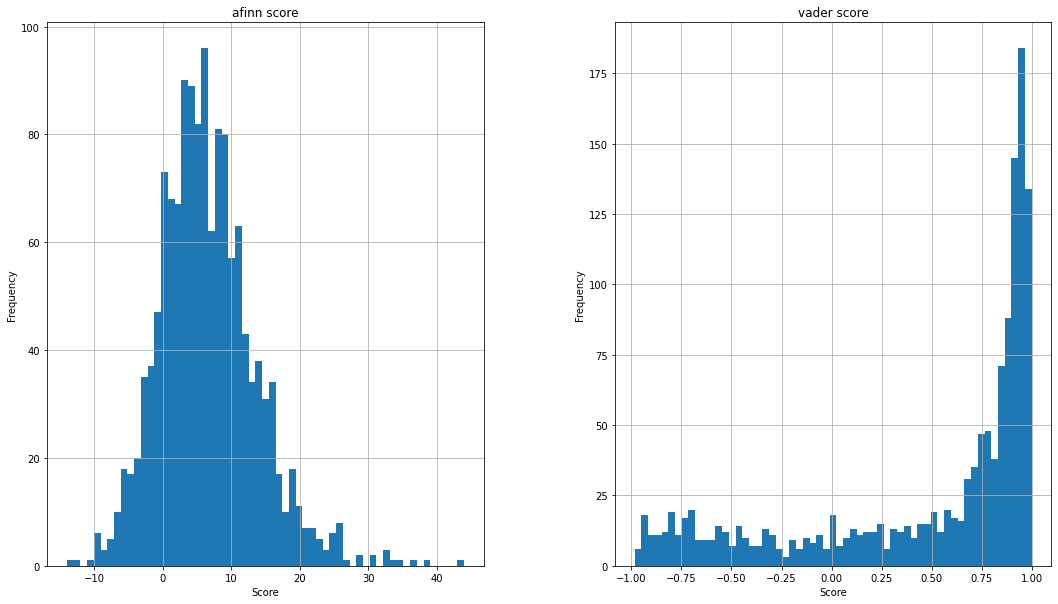

In [10]:
df_norm = pd.DataFrame(df, columns=['afinn score', 'vader score'])
axarr = df_norm.hist(figsize=(18, 10),bins=59, grid=True)

for ax in axarr.flatten():
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

Merged together, we could take a closer look at how the two compared against each other by using the scaled score columns for the two lexicons

Text(0.5, 0, 'Scores')

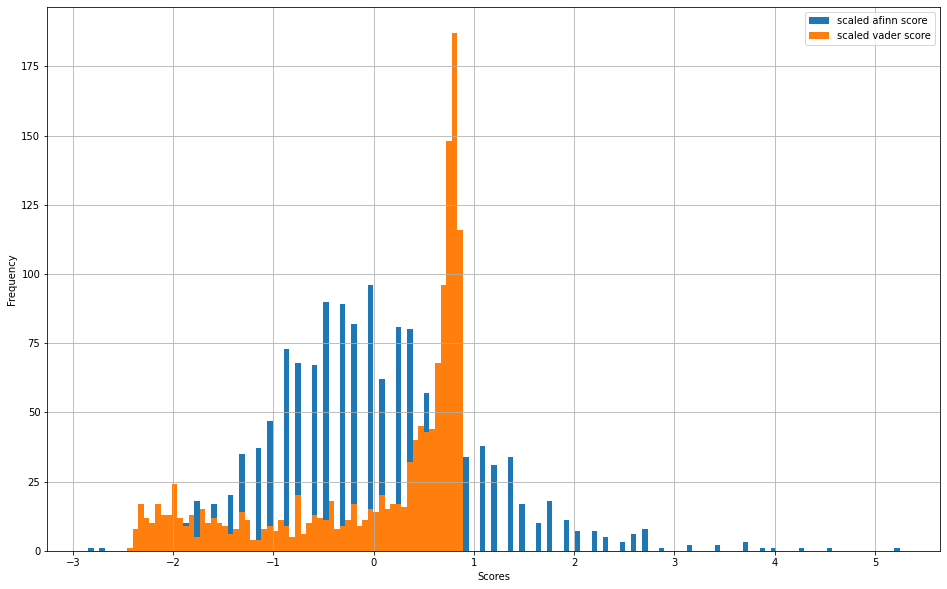

In [11]:
hist = pd.DataFrame(df, columns=['scaled afinn score', 'scaled vader score'])
hist.plot(kind='hist', figsize=(16, 10),bins=145, grid=True)
plt.xlabel("Scores")

Using the counts of categorical bin of the histogram, we could show how the sentiments compared for the two lexicons

positive   negative  neutral
afinn  1120-80.3%  201-14.4%  73-5.2%
vader  1065-76.4%  296-21.2%  33-2.4%

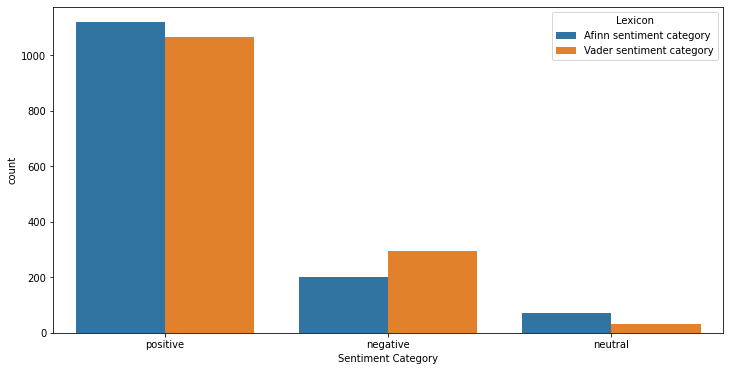

In [12]:
afList = ['Afinn sentiment category'] * 1394
vadList = ['Vader sentiment category'] * 1394

dfAf = pd.DataFrame(df, columns=['afinn sentiment category'])
dfAf['Lexicon'] = afList

dfVad = pd.DataFrame(df, columns=['vader sentiment category'])
dfVad['Lexicon'] = vadList

dfAf = dfAf.rename(columns={'afinn sentiment category':'Sentiment Category'})
dfVad = dfVad.rename(columns={'vader sentiment category':'Sentiment Category'})
plt.figure(figsize=(12, 6))

dfCat = dfAf.append(dfVad, ignore_index=True)
sns.countplot(x="Sentiment Category", hue="Lexicon", data=dfCat, order=['positive', 'negative', 'neutral'])

af = df['afinn sentiment category']
va = df['vader sentiment category']
affP = str(af.tolist().count('positive')) + "-" + str(round((af.tolist().count('positive')/1394)*100, 1)) + "%"
vadP = str(va.tolist().count('positive')) + "-" + str(round((va.tolist().count('positive')/1394)*100, 1)) + "%"

affNeg = str(af.tolist().count('negative')) + "-" + str(round((af.tolist().count('negative')/1394)*100, 1)) + "%"
vadNeg = str(va.tolist().count('negative')) + "-" + str(round((va.tolist().count('negative')/1394)*100, 1)) + "%"

affNeu = str(af.tolist().count('neutral')) + "-" + str(round((af.tolist().count('neutral')/1394)*100, 1)) + "%"
vadNeu = str(va.tolist().count('neutral')) + "-" + str(round((va.tolist().count('neutral')/1394)*100, 1)) + "%"

positive = pd.Series(data={'afinn': affP, 'vader': vadP}, name='positive')
negative = pd.Series(data={'afinn': affNeg, 'vader': vadNeg}, name='negative')
neutral = pd.Series(data={'afinn': affNeu, 'vader': vadNeu}, name='neutral')
dfMatch = pd.DataFrame(positive)
dfMatch['negative'] = negative
dfMatch['neutral'] = neutral

dfMatch

In [13]:
print('Most frequent category for Afinn:', stats.mode(df['afinn sentiment category'].values))
print('Most frequent category for Vader:', stats.mode(df['vader sentiment category'].values))

Most frequent category for Afinn: ModeResult(mode=array(['positive'], dtype=object), count=array([1120]))
Most frequent category for Vader: ModeResult(mode=array(['positive'], dtype=object), count=array([1065]))


### Correlation

- Next, we looked at the correlations between the data, specifically how helpful a review was in correlation to the score evaluated. For this, we used the 'reviews_scores_compound_scal.xlsx' file exported earlier.
- A new column "comment length" was also created. This was the sum of characters of the comment column for all the entries in the data frame.
- In order to properly evaluate the correlations, we parse the "helpful" column in the entire data frame, replacing valuels that read Nan (no helpful value given) with zeros

In [14]:
file = pd.read_excel ('reviews_scores_compound_scal.xlsx')
df = pd.DataFrame(file, columns=file.columns)
df['helpful'] = df['helpful'].fillna(0)

comLength = []
[comLength.append(len(af)) for af in df.iloc[:,4]]
df['comment length'] = comLength


df.loc[df['afinn sentiment category'] == 'positive', 'afinn sentiment category'] = 1
df.loc[df['afinn sentiment category'] == 'negative', 'afinn sentiment category'] = 2
df.loc[df['afinn sentiment category'] == 'neutral', 'afinn sentiment category'] = 3

df.loc[df['vader sentiment category'] == 'positive', 'vader sentiment category'] = 1
df.loc[df['vader sentiment category'] == 'negative', 'vader sentiment category'] = 2
df.loc[df['vader sentiment category'] == 'neutral', 'vader sentiment category'] = 3
df

Unnamed: 0       date                     reviewer  helpful  \
0              0 2020-03-27  reviewer's username removed   4967.0   
1              1 2020-04-12  reviewer's username removed   1754.0   
...          ...        ...                          ...      ...   
1392        1392 2020-04-07  reviewer's username removed      8.0   
1393        1393 2020-04-13  reviewer's username removed      7.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                             comment  \
0     This is a fun app but there are some curse words in videos. but if you put your birthday 2008 or up then it will give you kid friendly videos with a private account. I think this app is super cool and you should give it a try. Also when you download it you dont have to make an account to watch videos you can just watch them but you cant like anything. Anyway I highly recommend this app for at least 9 or older. Hope you enjoy!!   
1                                    This app is amazing! I honestly think you should have a filter for the sad little children who play this game. There's a ton of 13+ audios and videos that innocent children can run into. There should be a 13+ switch in the app settings for parents to use. And also, I think you shouldn't have a problem with LGBTQ. People can like who they want and you shouldn't ban them from streams if they do so.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                              ...   
1392                                 I mean- ......"DoNt bE ShY pUt SoMe mOrE";). ( Ive had this app for at least 2 years now and ive had no problems with it and i decided y not rate it tbh it takes up a lot of my time so when im bored i can just go on here next thing i know it has been 20 mins but yeah aswell as they got sum pretty funny things that made me die of luaghter and people of all ages are welcome to make fun videos!!:/ )   
1393                                                                                                                                                                                                                                                                              I use TikTok everyday, when I'm sad, happy, and bored. TikTok is great don't get me wrong but it's kinda addicting.. when you start scrolling you just can't stop.   

      afinn score afinn sentiment category  vader score  \
0              17                        1       0.9672   
1               1                        1       0.9383   
...           ...                      ...          ...   
1392            3                        1       0.9428   
1393           -1                        2       0.6607   

     vader sentiment category  scaled afinn score  scaled vader score  \
0                           1            1.476295            0.832504   
1                           1           -0.757274            0.784366   
...                       ...                 ...                 ...   
1392                        1           -0.478078            0.791861   
1393                        1           -1.036471            0.321967   

      comment length  
0                430  
1                399  
...              ...  
1392             399  
1393             162  

[1394 rows x 12 c

Using the corr() function of the pandas library, we then show an evaluation of the table of correlations. We then use the accuracy score of the correlation, which shows how the set of afinn scores predicted for a sample match the corresponding set of vader scores.

In [15]:
dateInt = []

[dateInt.append(int(s.strftime('%Y%m%d'))) for s in df['date'].tolist() ]

df['date int'] = dateInt
df['helpful'] = df['helpful'].fillna(0)

df_corr2 = pd.DataFrame(file, columns=['helpful', 'comment length', 'afinn score','vader score', 'date int'])

df_corr2.corr()


helpful  comment length  afinn score  vader score  date int
helpful         1.000000        0.250963     0.065554     0.006909 -0.003826
comment length  0.250963        1.000000     0.241828     0.002915  0.104685
afinn score     0.065554        0.241828     1.000000     0.687912 -0.083378
vader score     0.006909        0.002915     0.687912     1.000000 -0.111719
date int       -0.003826        0.104685    -0.083378    -0.111719  1.000000

In [16]:
x = df['afinn sentiment category'].values.astype(int)
y = df['vader sentiment category'].values.astype(int)
metrics.accuracy_score(y_pred=x, y_true=y)

0.8529411764705882

Next, we plot the helpful value against the comment length as a scatter plot. First this was done using all the data, then secondly with the extreme values stripped.

965
1291
163.0
965
Correlation without extreme values
0.13714139517562896


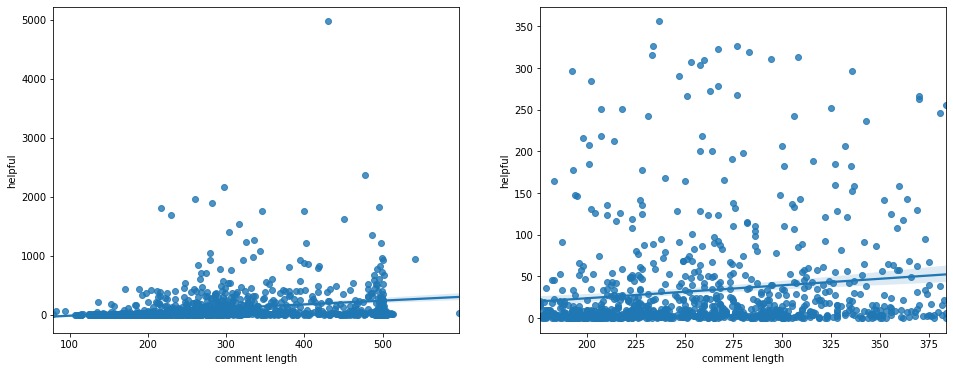

In [17]:
x = df['comment length'].values
y = df['helpful'].values


#eliminating values that are beyond n standard deviations
n = 1
m = 1
drop_extreme_x = [a for a in x if abs(a - np.mean(x)) < np.std(x) * n] 
drop_extreme_y = [a for a in y if abs(a - np.mean(y)) < np.std(y) * m]
print(len(drop_extreme_x))
print(len(drop_extreme_y))
print((len(drop_extreme_y) - len(drop_extreme_x)) /2)
print(len(drop_extreme_y[162:1127]))

#display correlation before eliminating extreme values
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.xlabel('comment length')
plt.ylabel('helpful')
sns.regplot(x=x,y=y)

#display correlation after eliminating extreme values
plt.subplot(1, 2, 2)
plt.xlabel('comment length')
plt.ylabel('helpful')
sns.regplot(x=drop_extreme_x,y=drop_extreme_y[162:1127])

print("Correlation without extreme values")
print(np.corrcoef(x=drop_extreme_x,y=drop_extreme_y[162:1127])[0,1])

### Visualizing effect of how helpful a review was voted against the length of its comment
- To make sense of the correlation, we can graph the original dataframe's data, this time only showing the how helpful a review was found in relation to the length of its comment
- For each of the lexicons, we plot each one, first with normal values including extremes, and then without extremes to get a more compact view of the data

965
985
10.0
965
Correlation
-0.07685699741310935


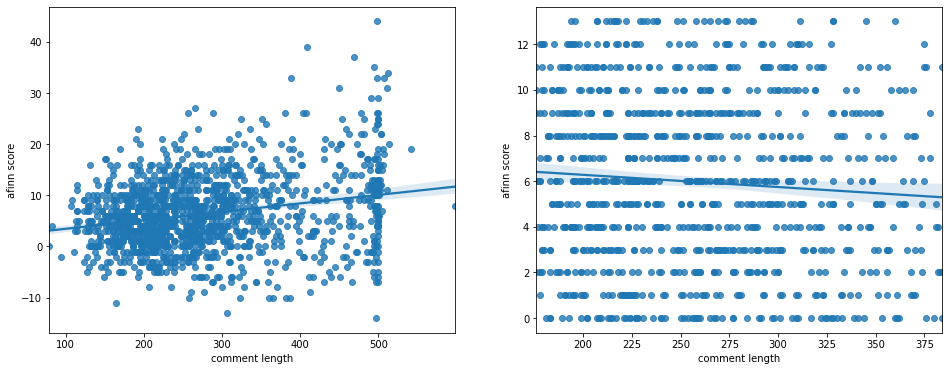

In [18]:
x = df['comment length'].values
y = df['afinn score'].values

#eliminating values that are beyond n standard deviations
n = 1
m = 1
drop_extreme_x = [a for a in x if abs(a - np.mean(x)) < np.std(x) * n] 
drop_extreme_y = [a for a in y if abs(a - np.mean(y)) < np.std(y) * m]

print(len(drop_extreme_x))
print(len(drop_extreme_y))
print((len(drop_extreme_y) - len(drop_extreme_x)) /2)
print(len(drop_extreme_y[4:969]))

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.xlabel('comment length')
plt.ylabel('afinn score')
sns.regplot(x=x,y=y)

#display correlation after eliminating extreme values
plt.subplot(1, 2, 2)
plt.xlabel('comment length')
plt.ylabel('afinn score')
sns.regplot(x=drop_extreme_x,y=drop_extreme_y[4:969])
print("Correlation")
print(np.corrcoef(drop_extreme_x,drop_extreme_y[4:969])[0,1])

The same is repeated, this time for the vader lexicon

965
1119
77.0
965
Correlation
0.04701806863740127


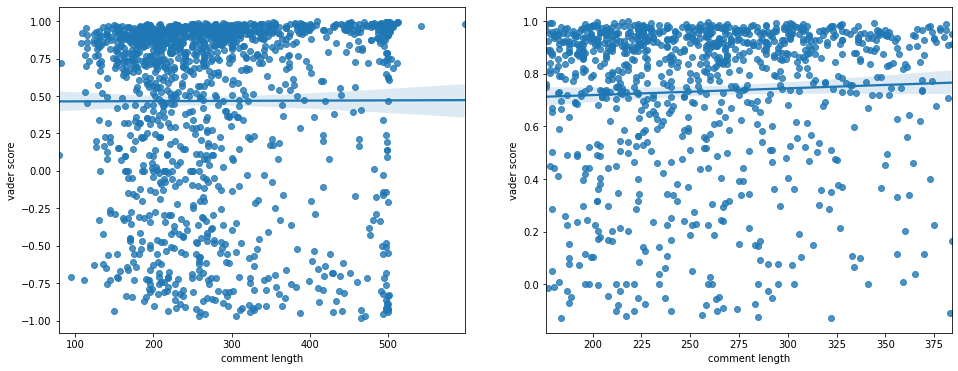

In [19]:
x = df['comment length'].values
y = df['vader score'].values

#eliminating values that are beyond n standard deviations
n = 1
m = 1
drop_extreme_x = [a for a in x if abs(a - np.mean(x)) < np.std(x) * n] 
drop_extreme_y = [a for a in y if abs(a - np.mean(y)) < np.std(y) * m]

print(len(drop_extreme_x))
print(len(drop_extreme_y))
print((len(drop_extreme_y) - len(drop_extreme_x)) /2)
print(len(drop_extreme_y[4:969]))

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.xlabel('comment length')
plt.ylabel('vader score')
sns.regplot(x=x,y=y)

#display correlation after eliminating extreme values
plt.subplot(1, 2, 2)
plt.xlabel('comment length')
plt.ylabel('vader score')
sns.regplot(x=drop_extreme_x,y=drop_extreme_y[4:969])
print("Correlation")
print(np.corrcoef(drop_extreme_x,drop_extreme_y[4:969])[0,1])

<AxesSubplot:>

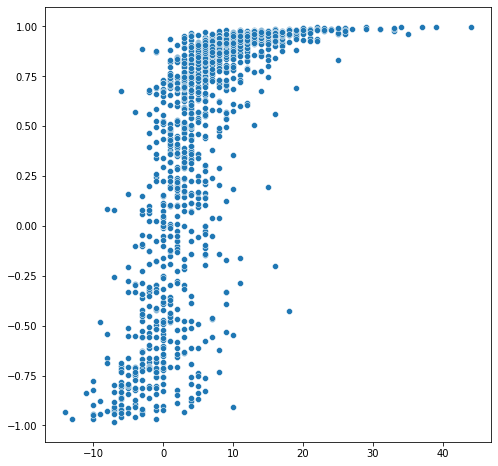

In [20]:
x = df['afinn score'].values
y = df['vader score'].values
plt.figure(figsize=(8, 8))
sns.scatterplot(x=x,y=y)

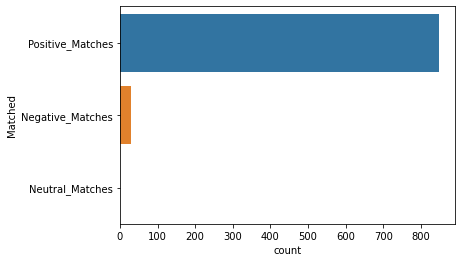

In [21]:
match = ['Positive_Matches'] * 848
match.extend(['Negative_Matches']* 30) 
match.append('Neutral_Matches')


dfMatch = pd.DataFrame(data=match, columns=['Matched'])

dfM = pd.DataFrame({'Total_Matches':['879'], 'Positive_Matches': ['848'], 'Negative_Matches': ['30'], 'Neutral_Matches':['1']})

sns.countplot(y=dfMatch['Matched'])
dfM.style.hide_index()

In [22]:
colors = ('r', 'g', 'b')
n =  0 if df.shape[0] % len(colors) == 0 else df.shape[0] % len(colors)  
df = df[:-n]
size=int(df.shape[0])
c_list = []
for c in colors:
    c_list.extend([c] * int(size/len(colors)))
    
def plot_3d_correlation(data_frame,title, col_1, col_2, col_3,color_list): 
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = mplot3d.Axes3D(fig)
    df = data_frame
    ax.scatter(xs=df[col_1],ys=df[col_2],zs=df[col_3], c=color_list)
    ax.set_title(title)
    x = df[col_1]
    y = df[col_2]
    z = df[col_3]
    ax.set_xlabel(col_1)
    ax.set_ylabel(col_2)
    ax.set_zlabel(col_3)
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('blue')
    ax.yaxis.label.set_color('green')
    
    return [ax,fig] 

### Animation 1: helpful vs comment length vs Afinn

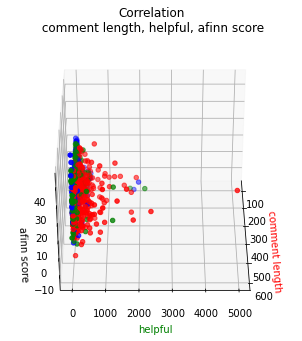

In [23]:
ax,fig = plot_3d_correlation(data_frame=df, title='Correlation\n comment length, helpful, afinn score', col_1='comment length',
                   col_2='helpful', col_3='afinn score', color_list=c_list)    


def animate(frame):
    ax.view_init(35, frame/3)
    plt.pause(.001)
    return fig
    
am = animation.FuncAnimation(fig, animate, frames=600, interval=50)
HTML(am.to_html5_video())

### Animation 2: helpful vs comment length vs Vader

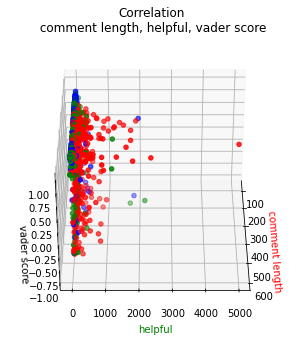

In [24]:
ax,fig = plot_3d_correlation(data_frame=df, title='Correlation\n comment length, helpful, vader score', col_1='comment length',
                   col_2='helpful', col_3='vader score', color_list=c_list)    

am = animation.FuncAnimation(fig, animate, frames=600, interval=50)
HTML(am.to_html5_video())